In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib notebook

Please input x: 273
Please input y: 325
Please input radius: 10


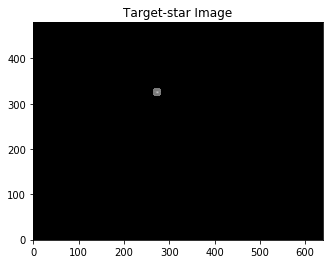

In [21]:
np.seterr(divide='ignore', invalid='ignore')
fits_dir = "/data/tnorecon/RECON_clean/yakima/"
fits_data = fits.getdata(fits_dir + "20201021/20201021_2/00100.fits")
fits_dark = fits.getdata(fits_dir + "20201021/20201021_4.dark")
fits_flat = fits.getdata(fits_dir + "20201021/20201021_3.flat")
normalized = fits_flat/(np.median(fits_flat))
dark_subtracted = np.subtract(fits_data, fits_dark)
flat_subtracted = np.true_divide(dark_subtracted, normalized)
y_arr, x_arr = np.shape(flat_subtracted)
y_arr, x_arr = np.ogrid[:y_arr,:x_arr]

def creat_circle_mask(y_arr, x_arr):
    plt.figure()
    plt.title("Target-star Image")
    x_axis  = int(input("Please input x: "))
    y_axis  = int(input("Please input y: "))
    radius  = int(input("Please input radius: "))
    masking = (x_arr-x_axis)**2 + (y_arr-y_axis)**2 <= radius**2     # Calculating and defining the aperture mask 
    masked  = np.multiply(flat_subtracted, masking)                   # Multiply with the original fits and output the new array
    masked[np.isnan(masked)] = 0
    plt.imshow(masked, cmap='gray', origin='top', vmin=0, vmax=255)
    
    
if __name__ == "__main__":
    creat_circle_mask(y_arr, x_arr)

#### 